In [50]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.linear_model import ElasticNet, ElasticNetCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
from abess import LinearRegression
from abess.decomposition import SparsePCA
from kennard_stone import train_test_split as ks_train_test_split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [7]:
def extractDragonDescriptors(family_Y_df, descriptorFileString):
    family_X = pd.read_csv(descriptorFileString, sep='\t', index_col=0, low_memory=False)
    colsX = family_X.columns
    family_X_resetIndex = pd.DataFrame(family_X.to_numpy(), index=family_Y_df.index, columns=family_X.columns).replace('na', np.NaN)
    return family_X_resetIndex[colsX[1:]].dropna(axis=1, how='any')

In [9]:
triph_Y = pd.read_csv('Data/exactPLS/triphenylamines.csv', index_col=0)
porph_Y = pd.read_csv('Data/exactPLS/ctPLS/porphyrins.csv', index_col=0)
pheno_Y = pd.read_csv('Data/exactPLS/phenothiazines.csv', index_col=0)
indol_Y = pd.read_csv('Data/exactPLS/indolines.csv', index_col=0)
couma_Y = pd.read_csv('Data/exactPLS/coumarins.csv', index_col=0)
carba_Y = pd.read_csv('Data/exactPLS/carbazoles.csv', index_col=0)
diphe_Y = pd.read_csv('Data/exactPLS/diphenylamines.csv', index_col=0)

couma_Y.rename(columns = {'Molecule SMILES':'Molecule SMILE'}, inplace = True)

In [8]:
triph_X = extractDragonDescriptors(triph_Y, 'Data/exactPLS/desc_triphenylamines.txt')
porph_X = extractDragonDescriptors(porph_Y, 'Data/exactPLS/desc_porphyrins.txt')
pheno_X = extractDragonDescriptors(pheno_Y, 'Data/exactPLS/desc_phenothiazines.txt')
indol_X = extractDragonDescriptors(indol_Y, 'Data/exactPLS/desc_indolines.txt')
couma_X = extractDragonDescriptors(couma_Y, 'Data/exactPLS/desc_coumarins.txt')
carba_X = extractDragonDescriptors(carba_Y, 'Data/exactPLS/desc_carbazoles.txt')
diphe_X = extractDragonDescriptors(diphe_Y, 'Data/exactPLS/desc_diphenylamines.txt')

In [11]:
triph_X['Family'] = "triphenylamine"
porph_X['Family'] = "porphyrin"
pheno_X['Family'] = "phenothiazine"
indol_X['Family'] = "indoline"
couma_X['Family'] = "coumarin"
carba_X['Family'] = "carbazole"
diphe_X['Family'] = "diphenylamine"

In [27]:
global_X = pd.concat([triph_X,porph_X,pheno_X,indol_X,couma_X,carba_X,diphe_X], axis=0).dropna(axis=1, how='any')

label_binarizer = LabelBinarizer()

family_binary_Ar = label_binarizer.fit_transform(global_X['Family'])

X_family = pd.DataFrame(family_binary_Ar, columns=label_binarizer.classes_, index=global_X.index)

global_X_family = pd.concat([global_X, X_family], axis = 1).drop(columns='Family', axis=1)

global_X_family

,MW,AMW,Se,Sp,Si,Me,Mp,Mi,GD,nAT,...,Vx,VvdwMG,SAscore,carbazole,coumarin,diphenylamine,indoline,phenothiazine,porphyrin,triphenylamine
S.No,,,,,,,,,,,,,,,,,,,,,
1,1071.66,7.390759,142.8535,101.1033,161.0030,0.985197,0.697264,1.110366,0.029910,145,...,1393.538206,574.499265,5.619172,0,0,0,0,0,0,1
2,442.54,7.902500,55.6942,40.5344,61.5674,0.994539,0.723829,1.099418,0.065954,56,...,579.269103,240.782419,3.681863,0,0,0,0,0,0,1
3,442.54,7.902500,55.6942,40.5344,61.5674,0.994539,0.723829,1.099418,0.065954,56,...,579.269103,240.782419,3.744709,0,0,0,0,0,0,1
4,340.40,8.104762,42.0434,30.2502,46.3218,1.001033,0.720243,1.102900,0.086154,42,...,438.637874,183.146670,3.276183,0,0,0,0,0,0,1
5,340.40,8.104762,42.0434,30.2502,46.3218,1.001033,0.720243,1.102900,0.086154,42,...,438.637874,183.146670,3.359140,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,616.85,7.090230,85.6466,60.3870,96.3042,0.984444,0.694103,1.106945,0.048104,87,...,833.172757,344.841294,4.329056,0,0,1,0,0,0,0
32,419.57,6.992833,59.7741,39.2788,67.5207,0.996235,0.654647,1.125345,0.070968,60,...,556.611296,231.496433,3.424933,0,0,1,0,0,0,0
33,435.64,7.260667,59.5232,40.4720,67.2313,0.992053,0.674533,1.120522,0.070968,60,...,574.019934,238.631120,3.502437,0,0,1,0,0,0,0


In [15]:
global_Y = pd.concat([triph_Y,porph_Y,pheno_Y,indol_Y,couma_Y,carba_Y,diphe_Y], axis=0)

global_Y

,Molecule SMILE,PCE
S.No,,
1,CCCCCCC(Cc1cc(sc1c1cc2c(s1)c1sc(cc1c1c2non1)c1...,6.18
2,N#C/C(=C\c1ccc(cc1)/C=C/c1cccc(c1)N(c1ccccc1)c...,2.23
3,N#CC(=Cc1ccc(cc1)C=Cc1ccc(cc1)N(c1ccccc1)c1ccc...,4.12
4,N#CC(=Cc1cccc(c1)N(c1ccccc1)c1ccccc1)C(=O)O,1.27
5,N#CC(=Cc1ccc(cc1)N(c1ccccc1)c1ccccc1)C(=O)O,2.92
...,...,...
31,CCCCc1ccc(cc1)N(c1ccc2c(c1)Cc1c2ccc(c1)c1ccc(c...,4.62
32,CCCCCCCCN(c1ccccc1)c1ccc(cc1)C=C1C(=O)NC(=O)NC1=O,1.53
33,CCCCCCCCN(c1ccccc1)c1ccc(cc1)C=C1C(=O)NC(=S)NC1=O,0.44


In [16]:
pd.concat([global_X, global_Y], axis = 1).corr()['PCE'].abs().sort_values(ascending=False).head(10)

PCE         1.000000
mintsC      0.474240
MaxtsC      0.432035
LOGPcons    0.405476
nCs         0.403580
C-002       0.403276
SssCH2      0.402945
nCsp3       0.397295
LOGP99      0.396008
H-046       0.395082
Name: PCE, dtype: float64

In [56]:
global_X_train, global_X_test, global_Y_train, global_Y_test = ks_train_test_split(global_X_family, global_Y['PCE'], test_size=0.3)

KeyboardInterrupt: 

In [110]:
model_RF = RandomForestRegressor()

rfe_200 = RFE(estimator=model_RF, n_features_to_select=200, step=1)

rfe_200.fit(global_X_train, global_Y_train)

global_X_train_rfe200 = global_X_train[global_X_train.columns[rfe_200.support_]]


In [107]:



rfModel = RandomForestRegressor(n_estimators=1000, max_features=150,  max_depth=12)

rfModel.fit(global_X_train_rfe200, global_Y_train)



predict_train = rfModel.predict(global_X_train_rfe200)
predict_test_ = rfModel.predict(global_X_test)

r2_train = r2_score(global_Y_train, predict_train)
r2_test = r2_score(global_Y_test, predict_test_)

mean_absolute_error(global_Y_test, predict_test_)

1.0840934260971031

In [108]:
r2_train, r2_test

(0.9082900010282836, 0.6012925066623143)

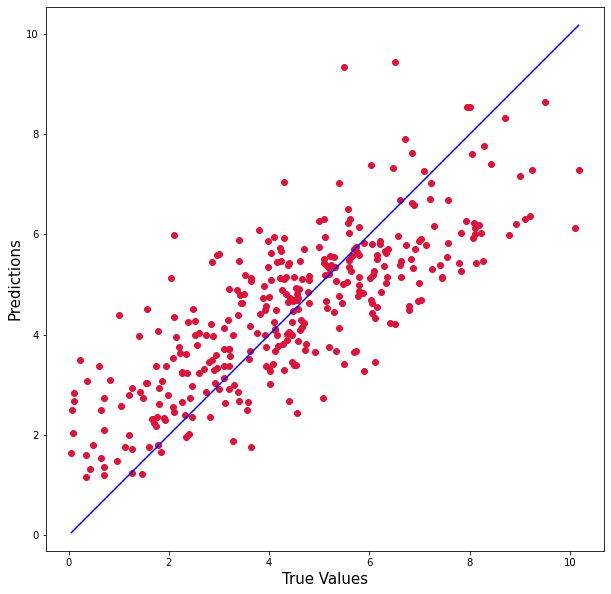

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(global_Y_test, predict_test_, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predict_test_), max(global_Y_test))
p2 = min(min(predict_test_), min(global_Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()